In [42]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")

from pyspec import spectrum

In [43]:
plt.rcParams.update({'font.size': 12
    , 'legend.markerscale': 1., 'axes.titlesize': 12, 'axes.labelsize' : 12,
      'legend.fontsize' : 10,'legend.handlelength': 3})

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

In [44]:
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
lw=3
aph=.7

In [45]:
data_path = './outputs/'
slab1=np.load(data_path+'spectra_'+'slab1_bcf.npz')
slab2=np.load(data_path+'spectra_'+'slab2_bcf.npz')
slab3=np.load(data_path+'spectra_'+'slab3_bcf.npz')
sampled = np.load(data_path+"spec_0m_sampling.npz")

In [46]:
## -2 and -3 slopes in the loglog space
ks = np.array([1.e-3,1])
Es2 = .2e-4*(ks**(-2))
Es3 = .35e-6*(ks**(-3))
rd1 = 22.64 # [km]
Enoise = np.ones(2)*2.*1.e-4

def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,200.,100.,40.,20.,10.,5.])
    lp=np.array([500,200,100,40,20,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')
    
def plt_spec_error(x=0.034,y=0.15, sn=200):
    Erl, Eru = spectrum.spec_error(y,sn=sn)
    err=np.array([y-Erl,Eru-y])[...,np.newaxis]
    plt.errorbar(x, y, yerr=err, color='k',fmt='.')
    plt.text(x+0.005,y-0.025,r'95 $\%$',fontsize=10)
    
def plt_adcp_spectrum(slab,vlevel=1,lw=3):
    """ Plots ADCP spectrum in the given vertical level 
            slab is a dictionary contaning the spectra """
    
    if vlevel==1:
        ltit = r'26-50 m, 400 DOF' 
        fig_num = 'a'
    elif vlevel==2:
        ltit=r'58-98 m, 400 DOF'
        fig_num = 'b'
    elif vlevel==3:
        ltit=r'106-202 m, 400 DOF'
        fig_num = 'c'

    
    fig = plt.figure(facecolor='w', figsize=(12.,10.))
    ax1 = fig.add_subplot(111)

    #ax1.fill_between(slab['k'],slab['Eul']/2.,slab['Euu']/2., color=color1, alpha=0.35)
    #ax1.fill_between(slab['k'],slab['Evl']/2.,slab['Evu']/2., color=color2, alpha=0.35)
    #ax1.fill_between(slab['k'],slab['Eufl']/2.,slab['Eufu']/2., color=color1, alpha=0.35)
    #ax1.fill_between(slab['k'],slab['Evfl']/2.,slab['Evfu']/2., color=color2, alpha=0.35)   
    #ax1.set_xscale('log'); ax1.set_yscale('log')

    ax1.loglog(slab['k'],slab['Eu']/2.,color=color1,linewidth=lw,
               label=r'$\hat{C}^u$: across-track')
    ax1.loglog(slab['k'],slab['Ev']/2.,color=color2,linewidth=lw,
               label=r'$\hat{C}^v$: along-track')
    
    ax1.loglog(slab['k'],slab['Euf']/2.,'--',color=color1,linewidth=lw)
    ax1.loglog(slab['k'],slab['Evf']/2.,'--',color=color2,linewidth=lw)

    ax1.loglog(slab['kK'],slab['Kpsi']/2,color=color3,linewidth=lw,
               label='$\hat{C}^\psi$: rotational')
    ax1.loglog(slab['kK'],slab['Kphi']/2,color=color4,linewidth=lw,
               label='$\hat{C}^\phi$: divergent')

    plt_spec_error()
    
    ax1.loglog(slab['kK'],slab['Kpsif']/2,'--',color=color3,linewidth=lw)
    ax1.loglog(slab['kK'],slab['Kphif']/2,'--',color=color4,linewidth=lw)
    
    ax1.axis((1./(1000),1./4,.4e-5,10))
    
    ax1.loglog(ks,Es2,'-', color='0.5',linewidth=2.)
    ax1.loglog(ks,Es3,'-', color='0.5',linewidth=2.)

    ax1.axis((1./(1000),1./4,.4e-5,10))

    plt.text(0.002, 1.941,u'-2')
    plt.text(0.006, 1.951,u'-3')
    
    plt.xlabel('Along-track wavenumber [cpkm]')
    plt.ylabel(u'KE spectral density [ m$^{2}$ s$^{-2}$/ cpkm]')
    
    lg = plt.legend(loc=3,title=ltit, numpoints=1,ncol=2)
    lg.draw_frame(False)

    plt.axis((1./1.e3,1./4.,.5/1.e4,5e0))

    plt.text(1./20, 3., "llc 4320 simulation", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))

    plt.text(1./5, 3., fig_num, size=35, rotation=0.)

    add_second_axis(ax1)
    
    plt.savefig('figs/spec_model_slab'+str(vlevel),bbox_inches='tight')


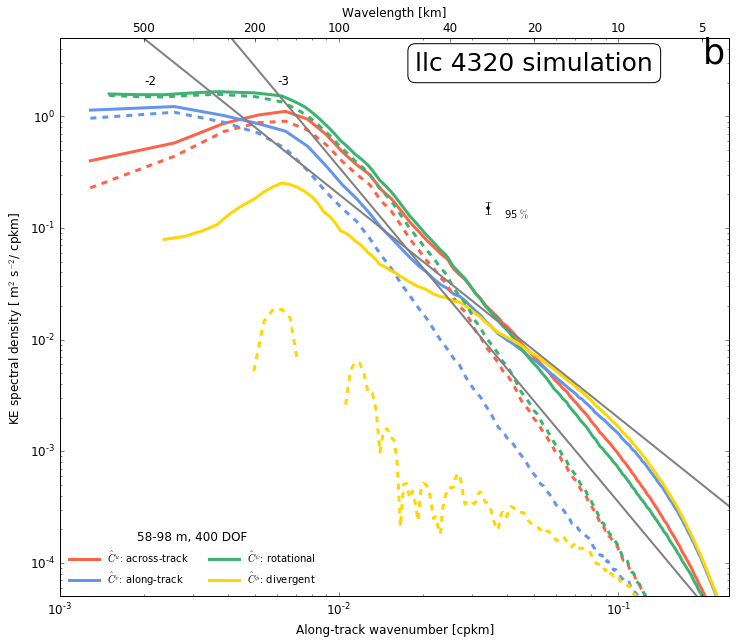

In [47]:
## 58-98 m
plt_adcp_spectrum(slab2,vlevel=2)

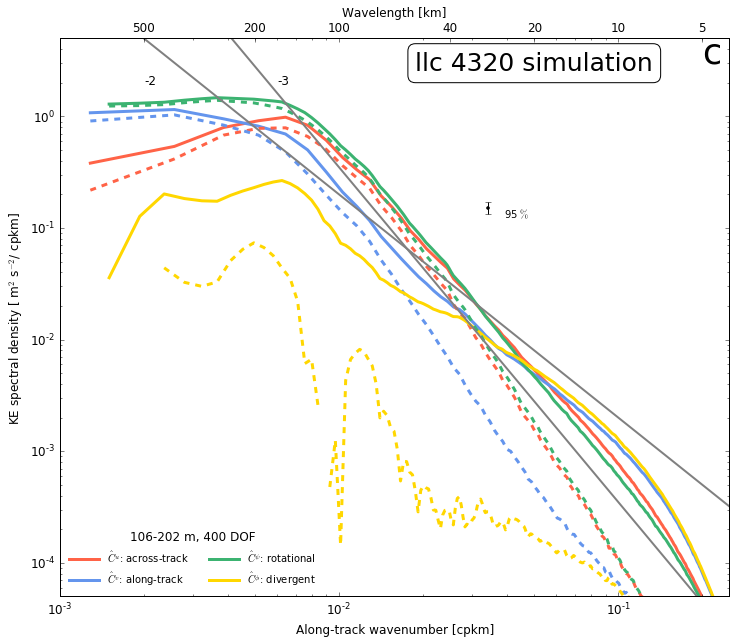

In [48]:
## 106-202 m
plt_adcp_spectrum(slab3,vlevel=3)

### Now plot the spectra of sampled model fields to assess aliasing

In [49]:
aph=.35
Eerr = 1.e-2
std_E = (1/np.sqrt(400))
Eerrl = Eerr/(1 + 2*std_E)
Eerru = Eerr/(1 - 2*std_E)

win = np.hanning(sampled['k'].size)
fac = (sampled['k'].size/(win**2).sum())

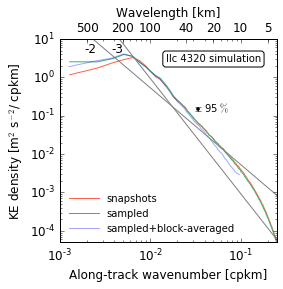

In [50]:
lw=1
fig = plt.figure(figsize=(8.27/2-.25,11.69/3-.25))
ax1 = fig.add_subplot(111)

ax1.loglog(sampled['k'],fac*sampled['Eu']/2.,color=color1,linewidth=lw,
               label=r'snapshots')
ax1.loglog(sampled['k'],fac*sampled['Eus']/2.,color=color3,linewidth=lw,
               label=r'sampled')
ax1.loglog(sampled['ksb'],fac*sampled['Eusb']/2.,color='b',linewidth=lw,
           label=r'sampled+block-averaged',alpha=aph)


# error bar reference
#ax1.loglog([.075,.075],[Eerrl,Eerru],'k',linewidth=2.)
#ax1.text (.0785,0.0088,r'$95\%$',fontsize=20)
plt_spec_error()

ax1.loglog(ks,fac*Es2,'-', color='0.5',linewidth=1.)
ax1.loglog(ks,fac*Es3,'-', color='0.5',linewidth=1.)
plt.text(0.00185, 4.25,u'-2')
plt.text(0.00375, 4.25,u'-3')
    
    
plt.xlabel('Along-track wavenumber [cpkm]')
plt.ylabel(u'KE density [m$^{2}$ s$^{-2}$/ cpkm]')
    
lg = plt.legend(loc=3,title='across-track spectrum', numpoints=1,ncol=2)
lg.draw_frame(False)

plt.axis((1./1.e3,1.,1./1.e6,1.e1))

lg = plt.legend(loc=3,title="", numpoints=1,ncol=1)
lg.draw_frame(False)

plt.axis((1./1.e3,1./4.,.5/1.e4,10e0))


plt.text(1./20, 3., "llc 4320 simulation", size=10, rotation=0.,
            ha="center", va="center",
            bbox = dict(boxstyle="round",ec='k',fc='w'))

add_second_axis(ax1)

plt.savefig('figs/spec_model_0m_sampled',bbox_inches='tight')
plt.savefig('figs/spec_model_0m_sampled.eps',bbox_inches='tight')
plt.savefig('figs/spec_model_0m_sampled.pdf',bbox_inches='tight')

In [51]:
#compare with adcp

In [52]:
slab2_adcp=np.load('../adcp/outputs/adcp_spec_slab2.npz')
slab2_model=np.load('1d_spec_100m.npz')

In [57]:
eiso = np.load('Eiso_uv_small.npz')
eiso.keys()

['Ew', 'K_w']

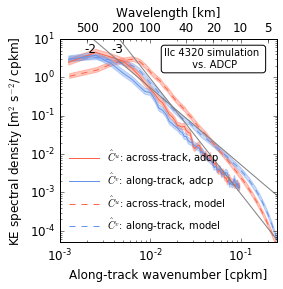

In [60]:
fig = plt.figure(figsize=(8.27/2-.25,11.69/3-.25))
ax1 = fig.add_subplot(111)

ax1.fill_between(slab2['k'],fac*slab2['Eul']/2.,fac*slab2['Euu']/2., color=color1, alpha=0.35)
ax1.fill_between(slab2['k'],fac*slab2['Evl']/2.,fac*slab2['Evu']/2., color=color2, alpha=0.35)
ax1.fill_between(slab2_adcp['k'],fac*slab2_adcp['Eul']/2,fac*slab2_adcp['Euu']/2, color=color1, alpha=0.35)
ax1.fill_between(slab2_adcp['k'],fac*slab2_adcp['Evl']/2,fac*slab2_adcp['Evu']/2, color=color2, alpha=0.35)
ax1.set_xscale('log'); ax1.set_yscale('log')

ax1.loglog(slab2_adcp['k'],fac*slab2_adcp['Eu']/2.,color=color1,linewidth=lw,
            label=r'$\hat{C}^u$: across-track, adcp')
ax1.loglog(slab2_adcp['k'],fac*slab2_adcp['Ev']/2.,color=color2,linewidth=lw,
            label=r'$\hat{C}^v$: along-track, adcp')

ax1.loglog(slab2['k'],fac*slab2['Eu']/2.,'--',color=color1,linewidth=lw,
            label=r'$\hat{C}^u$: across-track, model')
ax1.loglog(slab2['k'],fac*slab2['Ev']/2.,'--',color=color2,linewidth=lw,
            label=r'$\hat{C}^v$: along-track, model')

   
 
# error bar reference
#ax1.loglog([.075,.075],[Eerrl,Eerru],'k',linewidth=2.)
#ax1.text (.0785,0.0088,r'$95\%$',fontsize=20)
#plt_spec_error()

ax1.loglog(ks,fac*Es2,'-', color='0.5',linewidth=1.)
ax1.loglog(ks,fac*Es3,'-', color='0.5',linewidth=1.)
plt.text(0.00185, 4.25,u'-2')
plt.text(0.00375, 4.25,u'-3')
    
plt.xlabel('Along-track wavenumber [cpkm]')
plt.ylabel(u'KE spectral density [m$^{2}$ s$^{-2}$/ cpkm]')
    
lg = plt.legend(loc=3,title='', numpoints=1,ncol=1)
lg.draw_frame(False)

plt.text(1./20, 3., "llc 4320 simulation \n vs. ADCP", size=10, rotation=0.,
            ha="center", va="center",
            bbox = dict(boxstyle="round",ec='k',fc='w'))

plt.axis((1./1.e3,1.,1./1.e6,1.e1))

plt.axis((1./1.e3,1./4.,.5/1.e4,1e1))

add_second_axis(ax1)

plt.savefig('figs/spec_model_slab2_comparison',bbox_inches='tight')
plt.savefig('figs/spec_model_slab2_comparison.eps',bbox_inches='tight')
plt.savefig('figs/spec_model_slab2_comparison.pdf',bbox_inches='tight')


# depth dependence 

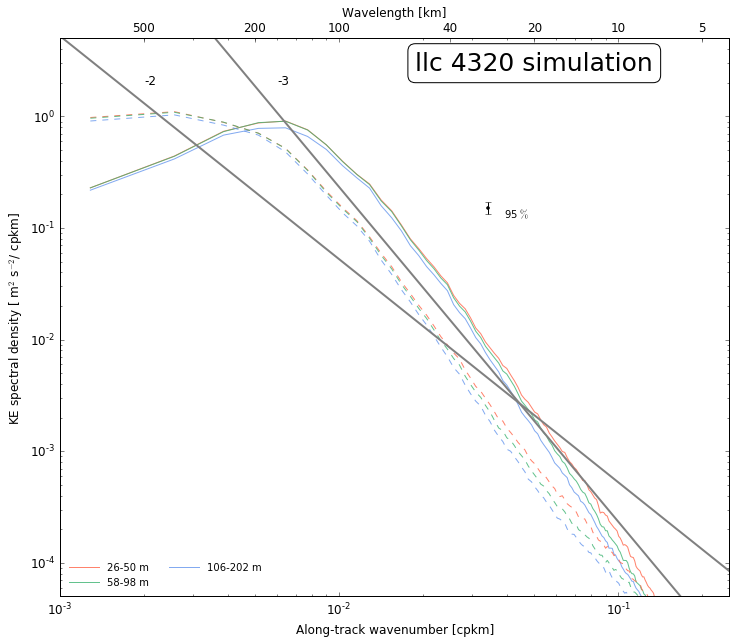

In [54]:
fig = plt.figure(facecolor='w', figsize=(12.,10.))
ax1 = fig.add_subplot(111)

#ax1.fill_between(slab1['k'],slab1['Eufl']/2.,slab1['Eufu']/2., color=color1, alpha=0.35)
#ax1.fill_between(slab1['k'],slab1['Evfl']/2.,slab1['Evfu']/2., color=color2, alpha=0.35)
#ax1.fill_between(slab2['k'],slab2['Eufl']/2.,slab2['Eufu']/2., color=color1, alpha=0.35)
#ax1.fill_between(slab2['k'],slab2['Evfl']/2.,slab2['Evfu']/2., color=color2, alpha=0.35)
#ax1.fill_between(slab3['k'],slab3['Eufl']/2.,slab3['Eufu']/2., color=color1, alpha=0.35)
#ax1.fill_between(slab3['k'],slab3['Evfl']/2.,slab3['Evfu']/2., color=color2, alpha=0.35)

ax1.loglog(slab1['k'],slab1['Euf']/2,'-',color=color1,alpha=.8,linewidth=lw,label='26-50 m')
ax1.loglog(slab2['k'],slab2['Euf']/2,'-',color=color3,alpha=.8,linewidth=lw,label='58-98 m')
ax1.loglog(slab3['k'],slab3['Euf']/2,'-',color=color2,alpha=.8,linewidth=lw,label='106-202 m')

ax1.loglog(slab1['k'],slab1['Evf']/2,'--',color=color1,alpha=.8,linewidth=lw)
ax1.loglog(slab2['k'],slab2['Evf']/2,'--',color=color3,alpha=.8,linewidth=lw)
ax1.loglog(slab3['k'],slab3['Evf']/2,'--',color=color2,alpha=.8,linewidth=lw)

plt_spec_error()

ax1.loglog(ks,Es2/3.8,'-', color='0.5',linewidth=2.)
ax1.loglog(ks,Es3/1.5,'-', color='0.5',linewidth=2.)

plt.text(1./20, 3., "llc 4320 simulation", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))

plt.text(0.002, 1.941,u'-2')
plt.text(0.006, 1.951,u'-3')

plt.xlabel('Along-track wavenumber [cpkm]')
plt.ylabel(u'KE spectral density [ m$^{2}$ s$^{-2}$/ cpkm]')
    
lg = plt.legend(loc=3,title='', numpoints=1,ncol=2)
lg.draw_frame(False)

plt.axis((1./1.e3,1./4.,.5/1.e4,5e0))

add_second_axis(ax1)

plt.savefig('figs/spec_model_depth_dependence',bbox_inches='tight')

In [55]:
Eerrl,Eerru, 0.1

(0.0090909090909090905, 0.011111111111111112, 0.1)

In [56]:
Erl, Eru = spectrum.spec_error(0.1,sn=200)
Erl, Eru,0.1

(0.089285714285714288, 0.11299435028248588, 0.1)